In [1]:
# import libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from keras.callbacks import EarlyStopping

In [2]:
# importing data

df = pd.read_csv('diamonds.csv',index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# splitting data into X and y
X = df.drop('price',axis=1)
y = df['price']


In [4]:
# encoding categorical data into numerical data

le = LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])


In [5]:
#splitting data into train and test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [6]:
# standardizing data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# creating neural network


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(256,activation='relu',input_shape=(9,)))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1))


c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss='mse')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=35, callbacks=[early_stop],validation_split=0.2)


Epoch 1/35
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 14494414.0000 - val_loss: 1462428.2500
Epoch 2/35
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1497973.2500 - val_loss: 1489123.8750
Epoch 3/35
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1585878.8750 - val_loss: 1318984.3750
Epoch 4/35
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 1289190.7500 - val_loss: 1245040.7500
Epoch 5/35
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 1279088.5000 - val_loss: 1196992.0000
Epoch 6/35
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1262590.0000 - val_loss: 1157577.5000
Epoch 7/35
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 1239073.8750 - val_loss: 1171578.5000
Epoch 8/35
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1255424.5000 - val_loss: 1125054.0000
Epoch 9/35
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1116541.5000 - val_loss: 1258727.5000
Epoch 10/35
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1199818.8750 - val_loss: 1080453

In [9]:
loss = model.evaluate(X_test,y_test)
print(f'the loss is {loss}')

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 785826.5000
the loss is 783477.75


In [10]:
model_pred = model.predict(X_test).reshape(1,-1)[0]
model_pred = pd.Series(model_pred)
model_pred.head()

338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


0     4948.935059
1     7092.632812
2     5466.735352
3    10578.598633
4     5247.345703
dtype: float32

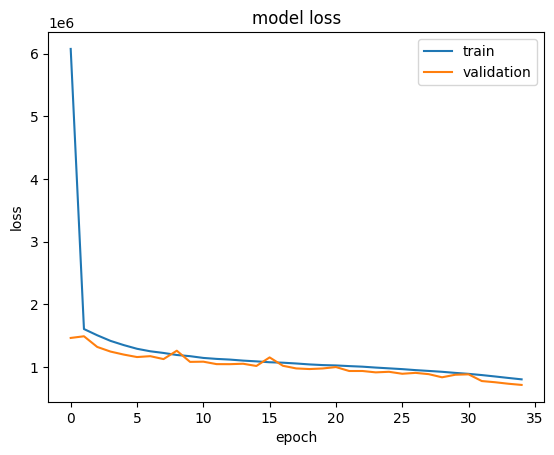

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')

